In [124]:
from main import MyPaddleOCR
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import IPython

최초에 한번은 Model을 다운로드 합니다. 경로는 Windows의 경우 C:/paddleocr/whl/rec/korean이고 Mac OS의 경우는 ~/.paddleocr/whl/rec/korean 입니다.

**Examples** 
```python
ocr = MyPaddleOCR()
ocr.run_ocr(IMAGE_PATH, debug=True)
```

In [346]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 512, width = 512),
    A.RandomResizedCrop(p=1, height= 820 ,width= 820, scale=(0.2, 0.85),ratio=(0.40, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(0, 0.2), contrast_limit=(0.4, 0.6), brightness_by_max=False),
    A.SafeRotate(always_apply=False, p=0.5, limit=(-10, 30), interpolation=1, border_mode=0, value=None, mask_value=None),
    A.CLAHE(always_apply=False, p=0.5, clip_limit=(1, 15), tile_grid_size=(8, 8)),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1, height=512, width=512)
    #A.pytorch.transforms.ToTensorV2()
])
transform_o = A.Compose([
    A.Resize(height = 400, width = 256)
])

In [347]:
med = 'tylenol'
img_path = './test_data/'+med+'.png'
save_path = './Data/preprocessed_img/'

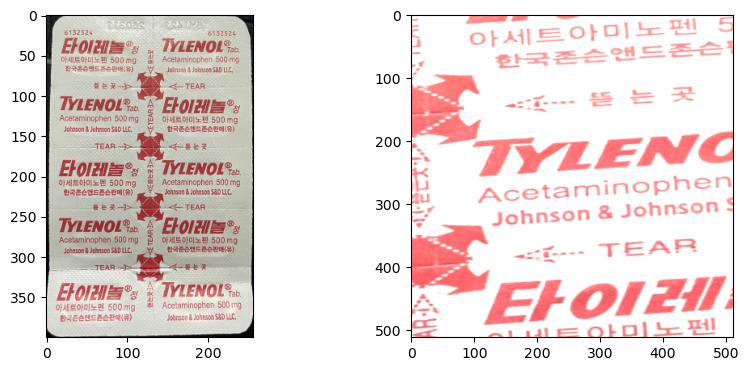

In [348]:

plt.figure(figsize=(10,200))
im_bgr = cv2.imread(img_path)
img = im_bgr[:, :, ::-1]

transformed_img = transform(image=img)["image"]

plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
plt.grid(False)
plt.subplot(40,2,2)

plt.imshow(transformed_img, cmap=plt.cm.binary)
plt.show()

In [321]:
img_array = Image.fromarray(transformed_img.astype(np.uint8))
file_name = f"{med}_preprocessed.jpg"
img_array.save(os.path.join(save_path,file_name))

In [314]:
from paddleocr import PaddleOCR

In [315]:
ocr = PaddleOCR(lang="korean", max_text_length=5, drop_score=0.5)

[2023/11/11 20:13:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\kwn06/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\kwn06/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_n

In [316]:
img_path = os.path.join(save_path,file_name)
result = ocr.ocr(img_path, cls=False)

[2023/11/11 20:13:05] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.22697162628173828
[2023/11/11 20:13:16] ppocr DEBUG: rec_res num  : 28, elapsed : 11.086348056793213


In [317]:
result[0]

[[[[138.0, 1.0], [186.0, 1.0], [186.0, 15.0], [138.0, 15.0]],
  ('년내먹', 0.5367875099182129)],
 [[[371.0, 0.0], [457.0, 8.0], [455.0, 27.0], [369.0, 18.0]],
  ('아세트', 0.8582684397697449)],
 [[[463.0, 8.0], [511.0, 16.0], [510.0, 37.0], [460.0, 29.0]],
  ('아도', 0.8021525144577026)],
 [[[384.0, 26.0], [448.0, 36.0], [445.0, 53.0], [381.0, 43.0]],
  ('한국', 0.9956831932067871)],
 [[[162.0, 112.0], [214.0, 128.0], [204.0, 161.0], [153.0, 146.0]],
  ('정', 0.8991031646728516)],
 [[[0.0, 131.0], [30.0, 136.0], [27.0, 156.0], [0.0, 151.0]],
  ('페', 0.7242928743362427)],
 [[[47.0, 137.0], [123.0, 149.0], [119.0, 174.0], [43.0, 162.0]],
  ('500', 0.998908519744873)],
 [[[3.0, 162.0], [166.0, 186.0], [163.0, 207.0], [0.0, 183.0]],
  ('슨판매유', 0.9820914268493652)],
 [[[131.0, 153.0], [189.0, 165.0], [185.0, 187.0], [127.0, 175.0]],
  ('19', 0.9257141351699829)],
 [[[331.0, 177.0], [511.0, 206.0], [508.0, 230.0], [327.0, 201.0]],
  ('Acetamino', 0.934580385684967)],
 [[[342.0, 212.0], [445.0, 228.0], 

In [297]:
def plt_imshow(title='image', img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) is str:
        img = cv2.imread(img)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

def show_img_with_ocr(img_path, result):
        img = cv2.imread(img_path)
        roi_img = img.copy()

        for text_result in result:
            text = text_result[1][0]
            tlX = int(text_result[0][0][0])
            tlY = int(text_result[0][0][1])
            trX = int(text_result[0][1][0])
            trY = int(text_result[0][1][1])
            brX = int(text_result[0][2][0])
            brY = int(text_result[0][2][1])
            blX = int(text_result[0][3][0])
            blY = int(text_result[0][3][1])

            pts = ((tlX, tlY), (trX, trY), (brX, brY), (blX, blY))

            topLeft = pts[0]
            topRight = pts[1]
            bottomRight = pts[2]
            bottomLeft = pts[3]

            cv2.line(roi_img, topLeft, topRight, (0, 255, 0), 2)
            cv2.line(roi_img, topRight, bottomRight, (0, 255, 0), 2)
            cv2.line(roi_img, bottomRight, bottomLeft, (0, 255, 0), 2)
            cv2.line(roi_img, bottomLeft, topLeft, (0, 255, 0), 2)
            #roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 20, font_size=15)

            #print(text)

        plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

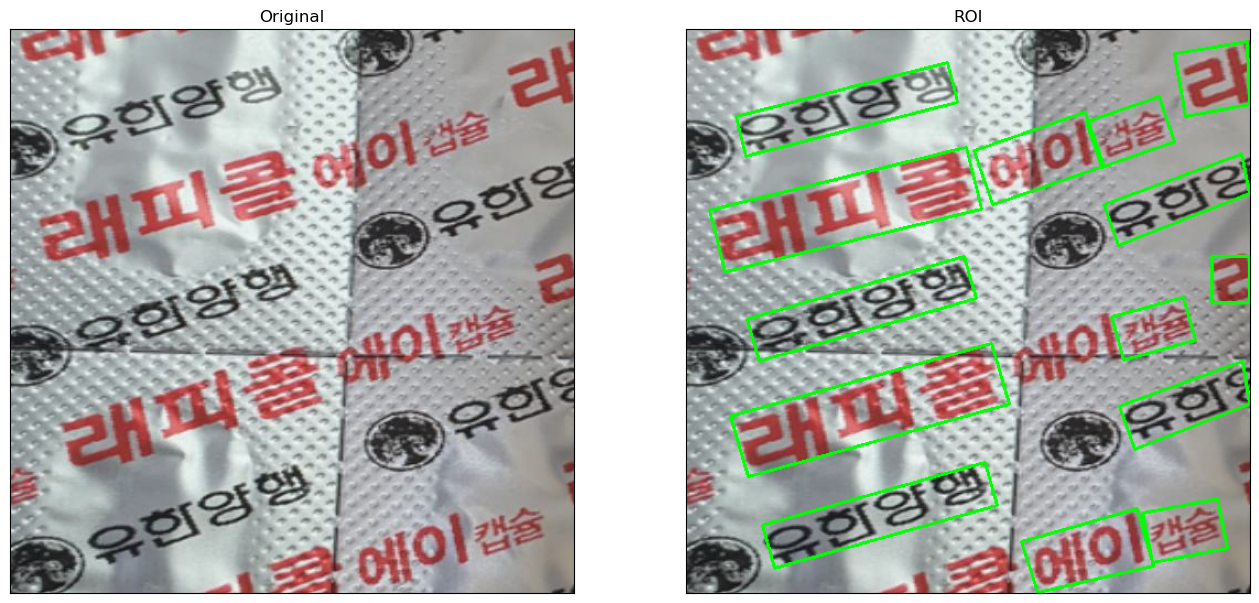

In [298]:
show_img_with_ocr(img_path, result[0])

In [299]:
result[0]

[[[[443.0, 22.0], [509.0, 11.0], [511.0, 68.0], [453.0, 79.0]],
  ('라', 0.999874472618103)],
 [[[45.0, 79.0], [237.0, 30.0], [246.0, 66.0], [54.0, 115.0]],
  ('유한양행', 0.9252626299858093)],
 [[[363.0, 84.0], [429.0, 61.0], [443.0, 102.0], [377.0, 125.0]],
  ('캡슐', 0.7230335474014282)],
 [[[261.0, 110.0], [362.0, 75.0], [379.0, 124.0], [278.0, 159.0]],
  ('어이', 0.8584818840026855)],
 [[[21.0, 164.0], [254.0, 107.0], [268.0, 163.0], [35.0, 220.0]],
  ('래피콜', 0.9967431426048279)],
 [[[379.0, 159.0], [504.0, 113.0], [511.0, 149.0], [392.0, 196.0]],
  ('유한양', 0.7184081673622131)],
 [[[477.0, 206.0], [511.0, 206.0], [511.0, 248.0], [477.0, 248.0]],
  ('근', 0.8833614587783813)],
 [[[55.0, 263.0], [252.0, 206.0], [263.0, 244.0], [66.0, 301.0]],
  ('유한양행', 0.9216395616531372)],
 [[[386.0, 261.0], [451.0, 243.0], [462.0, 282.0], [397.0, 300.0]],
  ('캡슐', 0.8568074703216553)],
 [[[40.0, 351.0], [277.0, 285.0], [293.0, 340.0], [56.0, 406.0]],
  ('래피올', 0.9329586029052734)],
 [[[393.0, 342.0], [505.

In [115]:
img_path = os.path.join(save_path,file_name)
ocr.run_ocr(img_path, debug=True)

AttributeError: 'PaddleOCR' object has no attribute 'run_ocr'

In [20]:
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 

In [17]:
ocr.get_available_models()

#1 Model Vesion : [PP-OCRv4] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#2 Model Vesion : [PP-OCRv3] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#3 Model Vesion : [PP-OCRv2] - Language : ['ch']
#4 Model Vesion : [PP-OCR] - Language : ['ch', 'en', 'french', 'german', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'structure']


In [5]:
ocr.get_available_langs()

Available Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'french', 'german', 'structure']


In [42]:
ocr.get_ocr_result()

[[[[297.0, 246.0], [388.0, 246.0], [388.0, 272.0], [297.0, 272.0]],
  ('아래한글', 0.9990288019180298)],
 [[[398.0, 247.0], [485.0, 247.0], [485.0, 272.0], [398.0, 272.0]],
  ('한글문서', 0.9990617036819458)],
 [[[297.0, 275.0], [363.0, 277.0], [362.0, 304.0], [296.0, 302.0]],
  ('디자인', 0.9998207092285156)],
 [[[632.0, 354.0], [701.0, 354.0], [701.0, 377.0], [632.0, 377.0]],
  ('202204', 0.9998807907104492)]]